### Student Information
Name: 吳霽函

Student ID: 109065523

GitHub ID: crescendoCat

Kaggle name: pullaP

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

# Menu
1. [Part1 Take Home Exercises](#Part1-Take-Home-Exercises)
2. [Part2 Kaggle Competition](#Part2-Kaggle-Competition)
3. [Part3 Competition Model Report](#Part3-Competition-Model-Report)

# Part1 Take Home Exercises
[Back to menu](#Menu)

## Preparing the Data

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


### My answer

In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv_train = CountVectorizer()
cv_test = CountVectorizer()
X_train = cv_train.fit_transform(train_df['text'])
X_test = cv_test.fit_transform(test_df['text'])

In [8]:
import numpy as np
def find_top(X, feature_names, number):
    x_counts = np.sum(X, axis=0)
    x_counts_sorted = np.argsort(-1*np.array(x_counts)) # to do a reverse sort
    return np.array(feature_names)[x_counts_sorted[0, :30]]

In [9]:
print(find_top(X_train, cv_train.get_feature_names(), 30))
print(find_top(X_test, cv_test.get_feature_names(), 30))

['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'all' 'like'
 'are' 'your' 'was' 'when' 'if']
['the' 'to' 'and' 'of' 'it' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'was' 'so' 'can' 'at' 'have' 'all' 'with' 'just' 'are' 'get' 'but'
 'up' 'this' 'your' 'not' 'like']


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

### My answer

In [10]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
# build analyzers (bag-of-words)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_1000[100:110]

/home/hsnl-iot/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Prepargin results

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

BOW_500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

/home/hsnl-iot/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


array(['fear', 'joy', 'fear', 'anger', 'sadness', 'joy', 'fear', 'anger',
       'anger', 'joy'], dtype=object)

In [12]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'fear', 'anger', 'sadness', 'joy', 'fear', 'anger',
       'anger', 'joy'], dtype=object)

training accuracy: 0.99
testing accuracy: 0.63
              precision    recall  f1-score   support

       anger       0.62      0.64      0.63        84
        fear       0.63      0.63      0.63       110
         joy       0.63      0.66      0.65        79
     sadness       0.64      0.59      0.62        74

    accuracy                           0.63       347
   macro avg       0.63      0.63      0.63       347
weighted avg       0.63      0.63      0.63       347



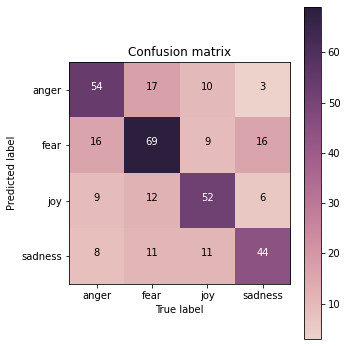

In [14]:

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))



print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### My answer

We can see the DT model using BOW_500 has a very high training accuracy as `0.99`, but the testing accuracy is low as `0.63`.
It may because the model has overfit on the dataset. Maybe DT model is too complicated.

In [13]:
print(DT_model.get_depth())
print(DT_model.get_n_leaves())

150
716


Our DT model has 150 layers and has 716 leaves! It is a very big tree trying to fit every token to output classes. But the emotion is not only depends on what words the talker says, but also depends on the structure of the sentences. I think the DT model may try to link different words together. DT has many branches and may link the words that are 'far' from each other. It may see a sentence have 'happy' and 'holiday' to be a 'happy' emotion sentence. But 'happy' and 'holiday' may have a lots of words between them such as 'not', 'bad', etc. and DT discard this kind of relationship. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### My answer

In [14]:
from sklearn.naive_bayes import MultinomialNB
## build DecisionTree model
MNB_model = MultinomialNB()

## training!
MNB_model = MNB_model.fit(X_train, y_train)

## predict!
y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'fear', 'anger', 'fear', 'anger', 'fear', 'fear',
       'anger', 'joy'], dtype='<U7')

In [16]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

training accuracy: 0.77
testing accuracy: 0.71


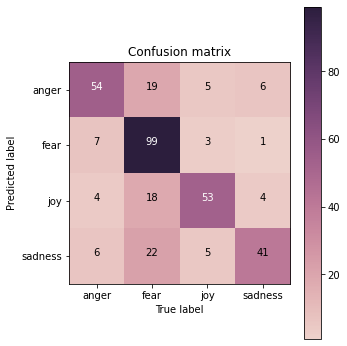

In [17]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### My answer
The Decision Tree model has a training accuracy = 0.99, but the testing accuracy is only 0.63. It seems that Decision Tree is seriously overfitting. The discussion on the overfitting is in above exercise.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

### My answer

In [18]:
log = pd.read_csv('./logs/training_log.csv')
log.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.361472,1.331391,0.446686,1.276590
1,1,0.636313,0.992425,0.651297,0.929196
2,2,0.789095,0.582367,0.697406,0.787697
3,3,0.842513,0.419081,0.680115,0.803206
4,4,0.882369,0.332085,0.691643,0.855447


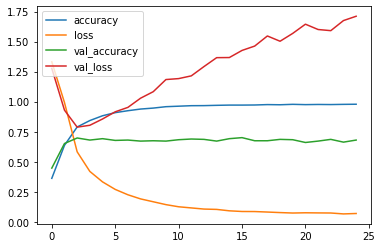

In [19]:
import matplotlib.pyplot as plt
plt.plot(log.index, log.drop(columns=['epoch']))
plt.legend(log.drop(columns=['epoch']).columns)

In [20]:
log.columns

Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### My answer
Yes, of course we can. For example, we have a sentence "How are you？", and the word vectors of "how", "are", and "you". One way to represent the sentence is combining the vectors of each words, like $S = [v_{how}, v_{are}, v_{you}]$, we can get a 2d metrix representation of the sentense. \
But a DNN model needs a fixed length input. The sentence matrix has a dynamic length due to the length of each sentence is different. To overcome this, we can add a padding to the matrix. Setting a $N$ as the max length of the sentence, then the sentence matrix's size will be $(N, |v|)$. If the sentence's length is greater then $N$, just cut it out, if the sentence's length is less then $N$, we add zero vectors untile the matrix's size = $(N, |v|)$

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

### My answer

In [22]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [25]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

### 9.1 Plot using t-SNE (2-dimension)

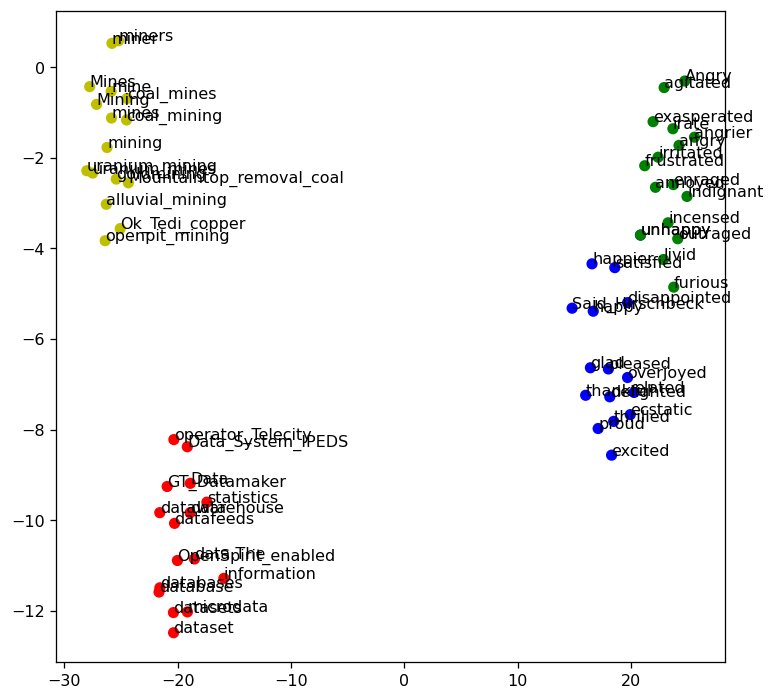

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part2 Kaggle Competition
[Back to menu](#Menu) \
After trying planty of models, I finally reached a accuracy of 0.46 in private leaderboard. There is a .ipynb file in this repository contains the best model I tried.
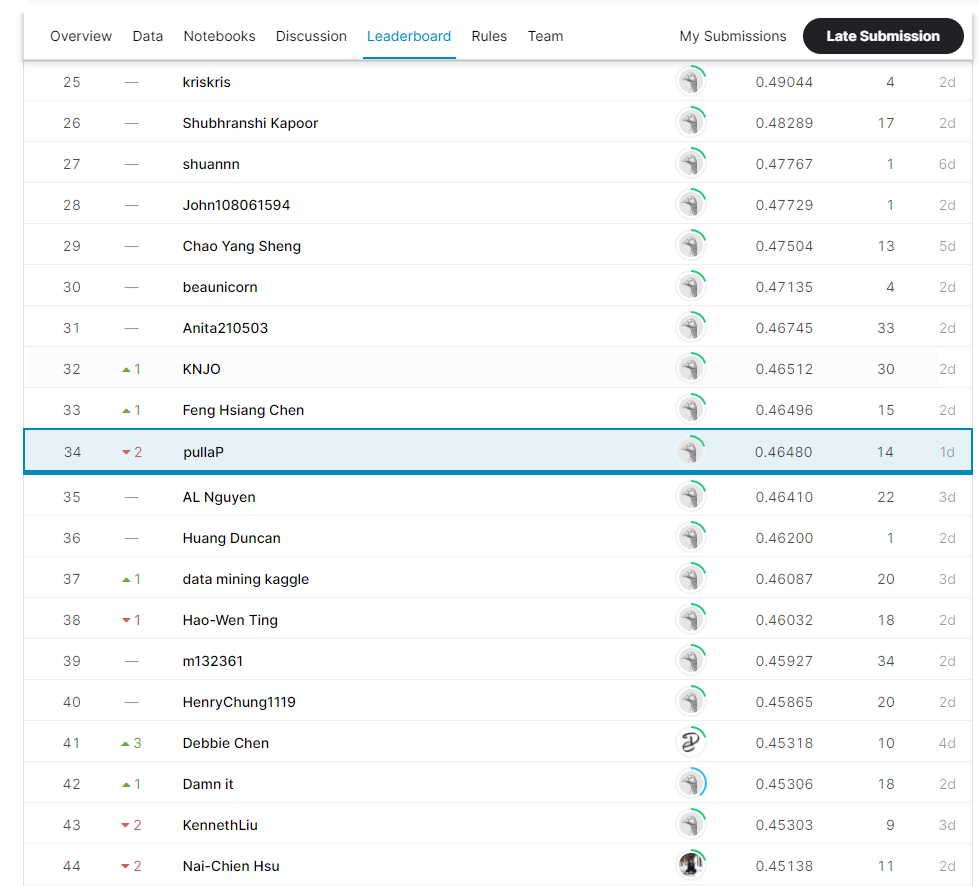

My final ranking is 34th, using a Bidirectional GRU core with Attention mechanism. But maybe I didn't give full play to the performance of Attention mechanism since the final accuracy is only 0.46. Maybe more time and more hyperparameter tunning will bring a better preformance

The models I used:

| Word Embedding | Feature Extract Structure | Prediction Layer | Accuracy | Remark |
| --- | --- | --- | --- | --- |
| W2V | Bidirectional GRU | Self Attention and FC layers | 0.464 |
| W2V | GRU | Self Attention and FC layers | 0.413 | dropout=0.4 |
| W2V | GRU | Self Attention and FC layers | 0.424 | dropout=0.5 |
| W2V | GRU | only FC layers | 0.407 | Class Balanced using Downsampling |
| W2V | CNN | FC layers | 0.406 | 120 filters |
| W2V | CNN | FC layers | 0.392 | 60 filters |
| WoB | DNN | FC layers | 0.389 |

Note that CNN models above are using Conv1D layers with 3 different window size: \[ 4, 3, 2 \] , and 2 different stride \[ 1, 2 \], total 6 Conv1D layers connect to W2V, then using a MaxPooling through out time axis. \
DNN is simple FC layers with layer witdh 10000 > 1024 > 512 > 128 > 32 > 8 then a softmax layer as output.

# Part3 Competition Model Report
[Back to menu](#Menu) \
The detect report is in the Biderictional_RNN.ipynb files, including data preprocessing, model design and a simple performance evaluation.